# Microbial Genetic Algorithm:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='paper', style='whitegrid', palette='colorblind')
import copy
from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
class Individual():

  def __init__(self, size):
    self.genotype = np.random.randint(0, 2, size)
    self.fitness = 0

  def Update_fitness(self, fitness):
    self.fitness = fitness

  def get_genotype(self):
    return self.genotype

# Microbial Class with graphing capabilities:

In [ ]:
class Microbial():
  
  def __init__(self, items, max_capacity, population, mutation_rate, crossover_rate):
    self.items = items
    self.max_capacity = max_capacity
    self.population = population
    self.mutation_rate = mutation_rate
    self.crossover_rate = crossover_rate
    self.benifitGrowth = []
    self.average = []
    self.top_individual = []
    for i in range(len(population)):
      self.benifitGrowth.append([])
  
  def fitness(self, individual):
    total_capacity = 0
    total_benifit = 0
    for i in range(len(self.items)):
      if individual.genotype[i] == 1:
        total_benifit += self.items[i][0]
        total_capacity += self.items[i][1]
    if total_capacity > self.max_capacity:
      total_benifit = 0
    return total_benifit

  def mutate(self, individual):
    mutate_prob = np.random.rand(len(individual.genotype))
    for i in range(len(mutate_prob)):
      if mutate_prob[i] < self.mutation_rate:
        individual.genotype[i] = 1^individual.genotype[i]
    return individual

  def crossover(self, strong, weak):
    cross_prob = np.random.rand(len(weak.genotype))
    for i in range(len(weak.genotype)):
      if cross_prob[i] < self.crossover_rate:
        weak.genotype[i] = strong.genotype[i]
    return weak

  def select(self, loc):
    parent = self.population[loc]
    adj_by = np.random.choice([-1, 1])
    loc = np.random.randint(len(self.population) - 1)
    if loc == len(self.population) and prob == 1:
      neigh_pos = 0
      #print("1. ", neigh_pos)
    elif loc == 0 and adj_by == -1:
      neigh_pos = len(self.population)-1
      #print("2. ", neigh_pos)
    else:
      neigh_pos = loc + adj_by
      #print("3. ", neigh_pos)
    parent_pos = loc
    return parent_pos, neigh_pos

  def select_tornament(self, strong, weak):
    child = self.crossover(strong, weak)
    child = self.mutate(child)
    # with this if they're all zero they stay zero.
    limit = 0
    while self.fitness(child) < self.fitness(strong) and limit != 3:
      tmp_child = self.mutate(copy.deepcopy(child))
      if self.fitness(tmp_child) > self.fitness(strong):
        child = tmp_child
      limit += 1
    return child #weak

  # Sets the individuals fitness within their object
  def set_fitness(self, individual):
    individual.Update_fitness(self.fitness(individual))

  def record_benifit(self):
    for i in range(len(self.population)):
      self.set_fitness(self.population[i])
      self.benifitGrowth[i].append(self.population[i].fitness)

  # Using tornament selection. Look into other selection methods 
  def evolve(self, iterations):
    for i in range(iterations):
      self.record_benifit()
      loc = np.random.randint(len(self.population) - 1)
      g1_loc, g2_loc = self.select(loc)
      g1 = copy.deepcopy(self.population[g1_loc])
      g2 = copy.deepcopy(self.population[g2_loc])
      if self.fitness(g1) > self.fitness(g2):
        g2 = self.select_tornament(g1, g2)
        self.population[g2_loc] = g2
      # here else might not be the best since you can have genes that have the same fitness # THIS WAS TRUE. ONCE OPTIMUM WAS MET IT SKEWED THE RESULTS.
      elif self.fitness(g2) > self.fitness(g1):
        g1 = self.select_tornament(g2, g1)
        self.population[g1_loc] = g1
      elif self.fitness(g1) == self.fitness(g2):
        if np.random.choice([0, 1]) == 0:
          g2 = self.select_tornament(g1, g2)
          self.population[g2_loc] = g2
        else:
          g1 = self.select_tornament(g2, g1)
          self.population[g1_loc] = g1
      
      avg = 0
      for i in range(len(self.population)):
        avg += self.population[i].fitness
      totl = avg/len(self.population)
      #print(totl)
      self.average.append(totl)

      avg = 0
      top = 0
      for i in range(len(self.population)):
        fit = self.population[i].fitness
        if fit > top:
          top = fit
      self.top_individual.append(top)

    return self.population

# The reference isn't being overritten. before g1 was a reference to the array location. and you could just overwrite it. now its just being saved as a copy and not changing the array.

# Single Microbial GA

[2.8, 5.0, 5.0, 5.0, 6.9, 6.9, 6.9, 6.9, 9.2, 10.8, 10.8, 10.8, 10.8, 11.8, 11.8, 10.2, 10.2, 8.4, 8.4, 8.4, 9.5, 10.8, 13.1, 13.1, 13.1, 13.1, 13.1, 12.0, 12.0, 12.0, 12.0, 9.8, 9.8, 11.4, 11.4, 13.2, 15.8, 16.1, 14.5, 15.5, 13.5, 11.2, 11.2, 11.2, 11.2, 11.2, 12.8, 15.7, 16.2, 14.4, 15.2, 14.4, 14.4, 15.2, 15.2, 15.2, 15.2, 17.4, 14.5, 14.5, 14.5, 12.9, 12.9, 12.9, 15.2, 16.5, 13.6, 13.5, 13.5, 12.2, 12.2, 14.7, 14.7, 14.7, 14.7, 16.6, 16.6, 17.7, 18.3, 16.0, 14.7, 12.2, 14.3, 14.3, 14.3, 14.3, 17.6, 15.5, 12.4, 12.4, 14.3, 12.4, 12.4, 14.1, 14.1, 15.8, 14.1, 16.2, 14.1, 14.1]


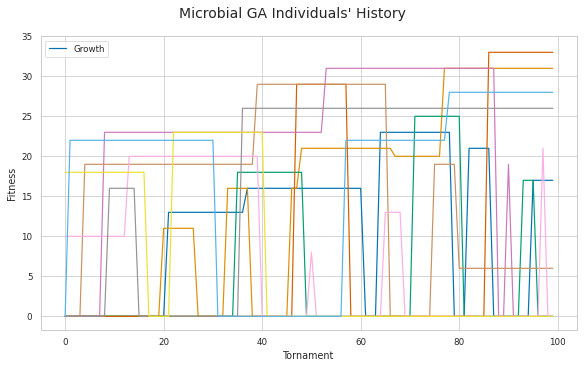

In [ ]:
# initialising a population p of individual objects
pop = []
for i in range(len(items)):
  pop.append(Individual(len(items)))
  
microbial = Microbial(items, 20, pop, 0.5, 0.5)
microbial.evolve(100)
print(microbial.average)

fig = plt.figure(figsize=[8, 5], constrained_layout=True)

for i in range(len(microbial.benifitGrowth)):
  plt.plot(microbial.benifitGrowth[i])
plt.xlabel("Tornament")
plt.ylabel("Fitness")
plt.legend(["Growth"])
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35])
fig.suptitle("Microbial GA Individuals' History", fontsize=14)
#fig.text(0.25, -0.075, "Figure 1: Growth of individuals withing a Microbial GA over 100 generations, \nwith a mutation rate of 0.5")
plt.savefig('microbial_ga_individuals.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()

In [ ]:
#files.download('microbial_ga_individuals.png')

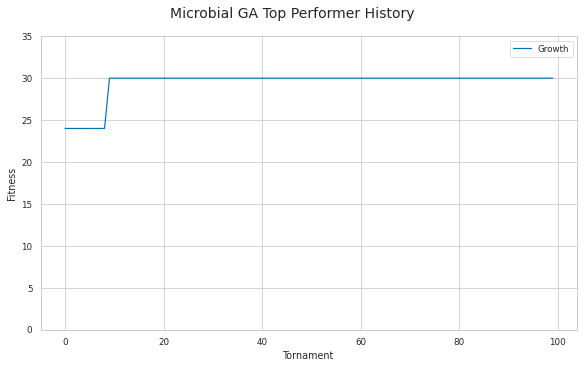

[24, 24, 24, 24, 24, 24, 24, 24, 24, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]


In [ ]:
# initialising a population p of individual objects
pop = []
for i in range(20):
  pop.append(Individual(len(items)))
  
microbial = Microbial(items, 20, pop, 0.5, 0.5)
microbial.evolve(100)

fig = plt.figure(figsize=[8, 5], constrained_layout=True)
max_geno = 0
plt.plot(microbial.top_individual)
plt.xlabel("Tornament")
plt.ylabel("Fitness")
plt.legend(["Growth"])
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35])
fig.suptitle("Microbial GA Top Performer History", fontsize=14)
#fig.text(0.25, -0.075, "Figure 1: Growth of an instance of a hill climber over 100 generations, \nwith a mutation rate of 0.5")
plt.savefig('microbial_ga_topperformer.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()

print(microbial.top_individual)

In [ ]:
#files.download('microbial_ga_topperformer.png')

# Multiple Microbial GAs

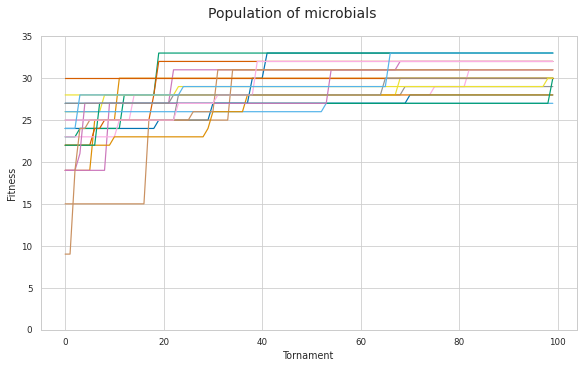

In [ ]:
microbial_list = []

for i in range(20):
  pop = []
  for i in range(20):
    pop.append(Individual(len(items)))
  microbial = Microbial(items, 20, pop, 0.5, 0.5)
  microbial.evolve(100)
  microbial_list.append(microbial)

fig = plt.figure(figsize=[8, 5], constrained_layout=True)
for microb in microbial_list:
  plt.plot(microb.top_individual)
  plt.xlabel("Tornament")
  plt.ylabel("Fitness")
  plt.yticks([0, 5, 10, 15, 20, 25, 30, 35])
fig.suptitle("Population of microbials", fontsize=14)
#fig.text(0.15, -0.075, "Figure 2: Plots the growth of fitness for a series of microbials over 100 generations, \nwith a mutation rate of 0.5")
plt.savefig('microbial_population.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()

In [ ]:
#files.download('microbial_population.png')

# Comparing Mutation rates

## Growth rate over 100 iterations (mutation range 10% to 90%):

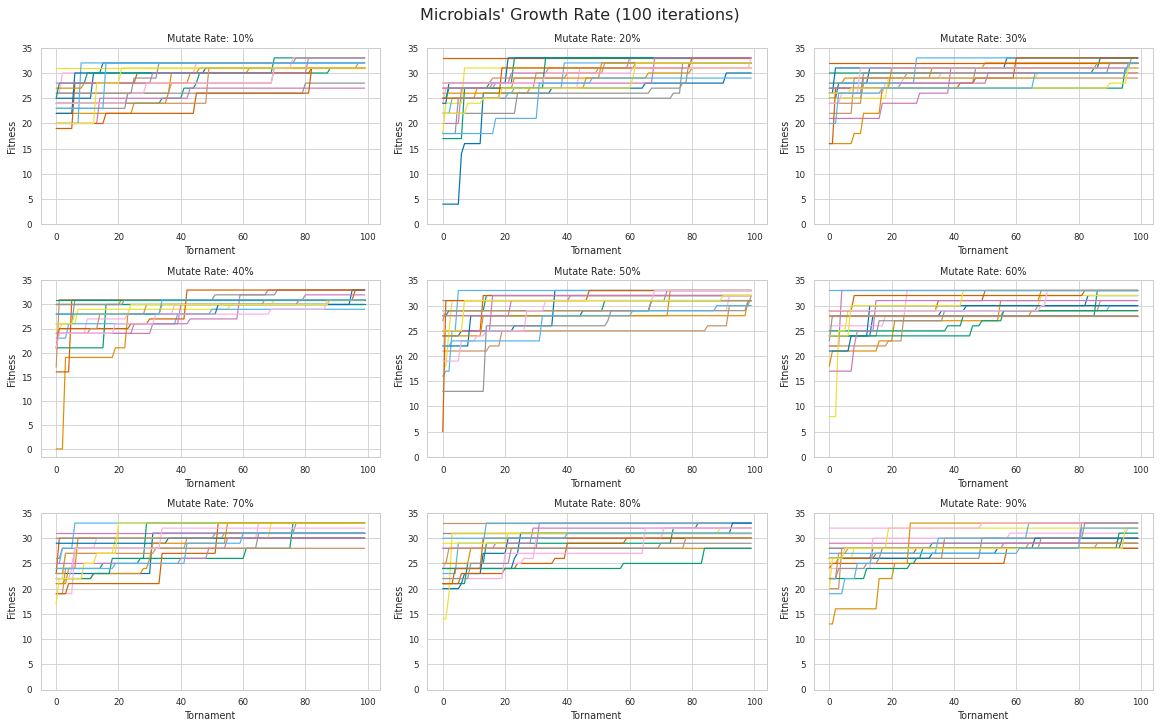

In [ ]:
counter = 0
fig, axes = plt.subplots(3, 3, figsize=(8*2, 5*2), constrained_layout=True)
for i in range(3):
  for j in range(3):
    counter += 1
    axes[i, j].set_title("Mutate Rate: " + str(counter*10) + "%")
    for l in range(20):
      pop = []
      for p in range(20):
        pop.append(Individual(len(items)))
      microbial = Microbial(items, 20, pop, counter/10, 0.5)
      microbial.evolve(100)
      axes[i, j].plot(microbial.top_individual)
    axes[i, j].set_xlabel("Tornament")
    axes[i, j].set_ylabel("Fitness")
    axes[i, j].set_yticks([0, 5, 10, 15, 20, 25, 30, 35])
fig.suptitle("Microbials' Growth Rate (100 iterations)", fontsize=16)
#fig.text(0.2, -0.025, "Figure 3: Plots of the fitness growth of a series of microbials over 100 iterations. Shown using a variety of mutation rates.")
plt.savefig('microbial_mutation_100.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()

In [ ]:
#files.download('microbial_mutation_100.png')

## Growth rate over 4000 iterations (mutation range 10% to 90%):

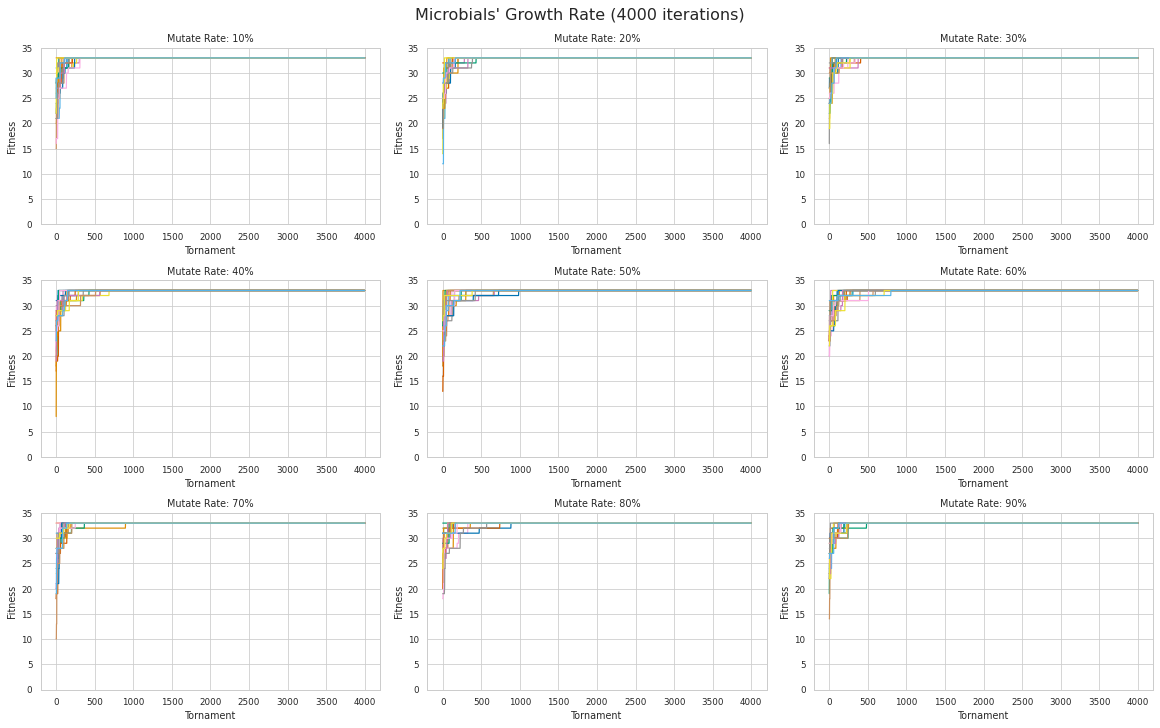

In [ ]:
counter = 0
fig, axes = plt.subplots(3, 3, figsize=(8*2, 5*2), constrained_layout=True)
for i in range(3):
  for j in range(3):
    counter += 1
    axes[i, j].set_title("Mutate Rate: " + str(counter*10) + "%")
    for l in range(20):
      pop = []
      for indiv in range(20):
        pop.append(Individual(len(items)))
      microbial = Microbial(items, 20, pop, counter/10, 0.5)
      microbial.evolve(4000)
      axes[i, j].plot(microbial.top_individual)
    axes[i, j].set_xlabel("Tornament")
    axes[i, j].set_ylabel("Fitness")
    axes[i, j].set_yticks([0, 5, 10, 15, 20, 25, 30, 35])
fig.suptitle("Microbials' Growth Rate (4000 iterations)", fontsize=16)
#fig.text(0.2, -0.025, "Figure 3: Plots of the fitness growth of a series of microbials over 4000 iterations. Shown using varying mutation rates.")
plt.savefig('microbial_mutation_4000.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()

In [ ]:
#files.download('microbial_mutation_4000.png')

# growth rate with changing crossover rates.

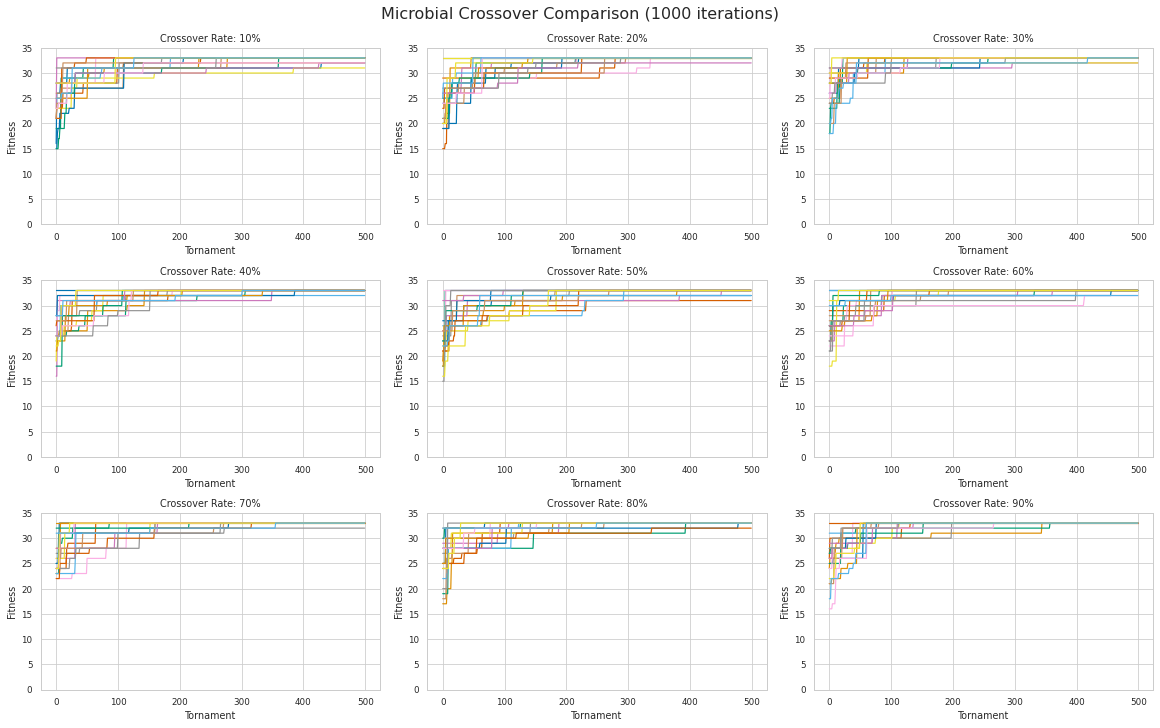

In [ ]:
counter = 0
fig, axes = plt.subplots(3, 3, figsize=(8*2, 5*2), constrained_layout=True)
for i in range(3):
  for j in range(3):
    counter += 1
    axes[i, j].set_title("Crossover Rate: " + str(counter*10) + "%")
    for l in range(20):
      pop = []
      for indiv in range(20):
        pop.append(Individual(len(items)))
      microbial = Microbial(items, 20, pop, 0.3, counter/10)
      microbial.evolve(500)
      axes[i, j].plot(microbial.top_individual)
    axes[i, j].set_xlabel("Tornament")
    axes[i, j].set_ylabel("Fitness")
    axes[i, j].set_yticks([0, 5, 10, 15, 20, 25, 30, 35])
fig.suptitle("Microbial Crossover Comparison (1000 iterations)", fontsize=16)
#fig.text(0.2, -0.025, "Figure 3: Plots of the fitness growth of a series of microbials over 500 iterations. Shown using varying crossover rates.")
plt.savefig('microbial_crossover_rate.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()

In [ ]:
#files.download('microbial_crossover_rate.png')

# Average fitness for varying mutation rates (10% to 90%)

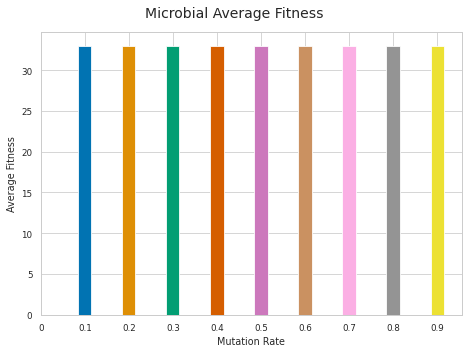

In [ ]:
counter = 0
num_of_microbials = 150
fig = plt.figure(figsize=[6.4, 4.8],constrained_layout=True)
for i in range(9):
  counter += 1
  total = 0
  for j in range(num_of_microbials):
    pop = []
    for p in range(20):
      pop.append(Individual(len(items)))
    microbial = Microbial(items, 20, pop, counter/10, 0.5)
    microbial.evolve(1000)
    total += microbial.top_individual[len(microbial.top_individual) - 1]
  plt.bar(counter, total/num_of_microbials, width=0.3)
plt.xlabel("Mutation Rate")
plt.ylabel("Average Fitness")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
fig.suptitle("Microbial Average Fitness", fontsize=14)
#fig.text(0.075, -0.075, "Figure 5: Plots the average fitness of a 150 hill climbers over 1000 iterations \nfor a variety of mutation rates.")
plt.savefig('microbial_average.png', bbox_inches='tight', dpi=400)
plt.show()
plt.close()

In [ ]:
#files.download('microbial_average.png')

# Average fitness for varying mutation rates (10% to 90%) **and iterations**

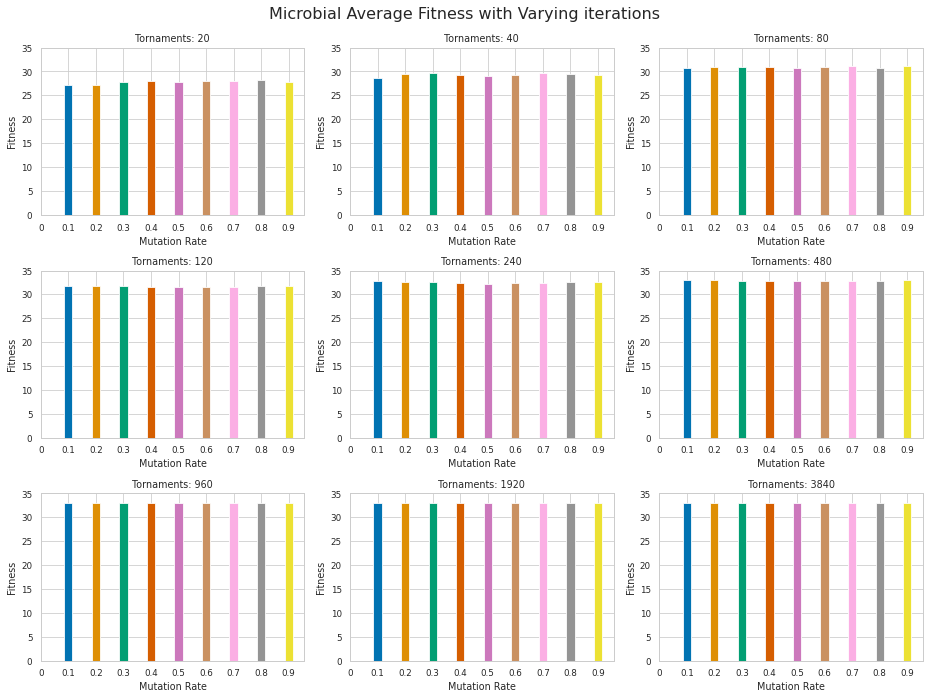

In [ ]:
iterationList = [20, 40, 80, 120, 240, 480, 960, 1920, 3840]

iterationCounter = 0
num_of_microbials = 150
fig, axes = plt.subplots(3, 3, figsize=[6.4 * 2, 4.8 * 2], constrained_layout=True)

for i in range(3):
  for j in range(3):
    iterationRate = iterationList[iterationCounter]
    iterationCounter += 1
    counter = 0
    for c in range(9):
      total = 0
      counter += 1
      for l in range(num_of_microbials):
        pop = []
        for p in range(20):
          pop.append(Individual(len(items)))
        microbial = Microbial(items, 20, pop, counter/10, 0.5)
        microbial.evolve(iterationRate)
        total += microbial.top_individual[len(microbial.top_individual) - 1]
      axes[i, j].bar(counter, total/num_of_microbials, width=0.3)
      axes[i, j].set_xlabel("Mutation Rate")
      axes[i, j].set_ylabel("Fitness")
      axes[i, j].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
      axes[i, j].set_xticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
      axes[i, j].set_yticks([0, 5, 10, 15, 20, 25, 30, 35])
      axes[i, j].set_title("Tornaments: " + str(iterationList[iterationCounter - 1]))
fig.suptitle("Microbial Average Fitness with Varying iterations", fontsize=16)
#fig.text(0.2, -0.025, "Figure 6: Plots the average fitness of 150 microbials over different iterations for a variety of mutation rates.")
plt.savefig('microbial_average_different_iter.png')
plt.show()
plt.close()

In [ ]:
files.download('microbial_average_different_iter.png')